<a href="https://colab.research.google.com/github/sanskriti111-j/Data-Analysis/blob/main/Outlier_Detection_and_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/student_habits_performance.csv')

In [ ]:
df.sample(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
596,S1596,21,Male,3.3,2.7,1.9,No,98.2,8.3,Fair,3,Bachelor,Poor,1,No,66.1
258,S1258,24,Female,5.8,3.0,0.4,No,66.5,3.2,Fair,2,High School,Average,8,No,90.8
21,S1021,21,Male,5.6,2.1,2.4,No,95.6,7.2,Fair,1,High School,Good,3,No,82.5
407,S1407,24,Male,4.3,3.3,3.0,No,79.4,6.3,Fair,5,High School,Poor,6,Yes,67.3
855,S1855,21,Female,3.2,3.7,1.2,No,59.9,6.0,Fair,6,High School,Good,2,No,56.1
454,S1454,21,Male,3.2,3.2,2.6,Yes,78.0,4.2,Fair,5,Bachelor,Poor,1,No,46.7
896,S1896,22,Male,2.8,1.8,3.4,Yes,74.0,5.1,Good,6,High School,Average,5,No,58.4
266,S1266,20,Female,6.6,3.2,2.1,No,86.5,9.3,Fair,5,Master,Average,4,Yes,100.0
692,S1692,21,Male,1.7,1.2,3.2,No,76.9,5.8,Good,4,High School,Average,5,Yes,37.4
860,S1860,20,Female,3.6,3.9,4.2,No,100.0,8.3,Poor,1,High School,Poor,8,Yes,65.6


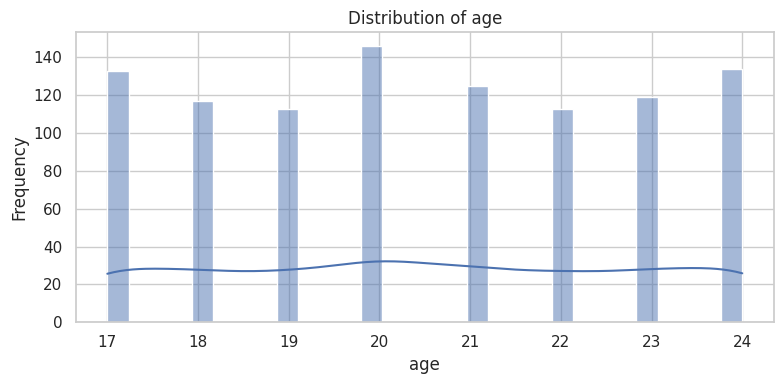

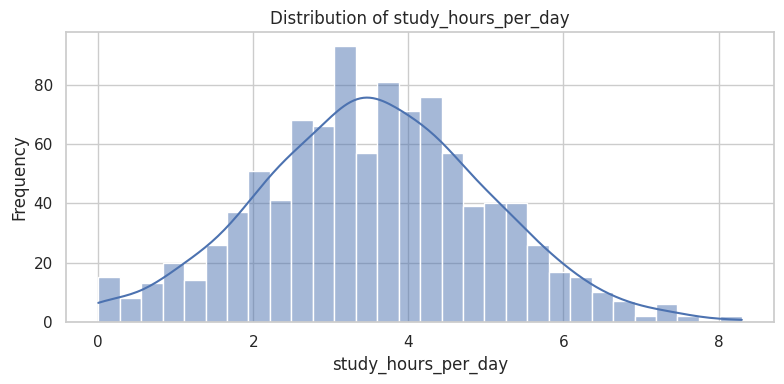

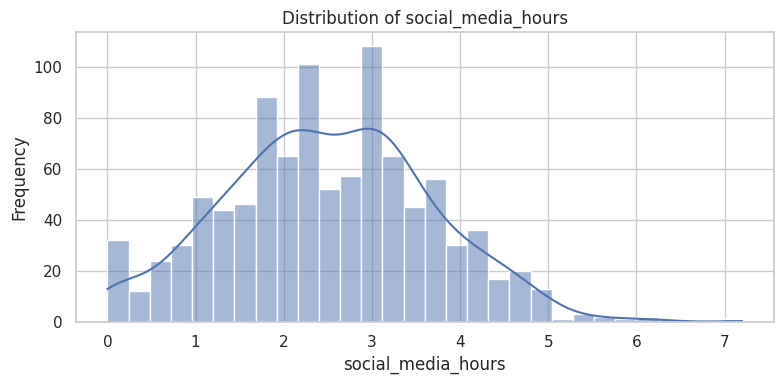

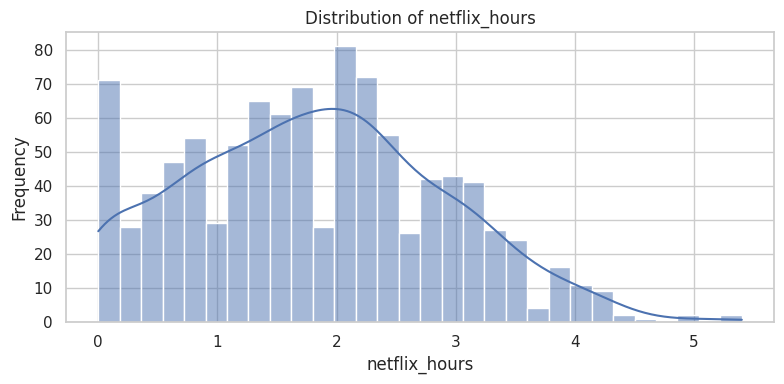

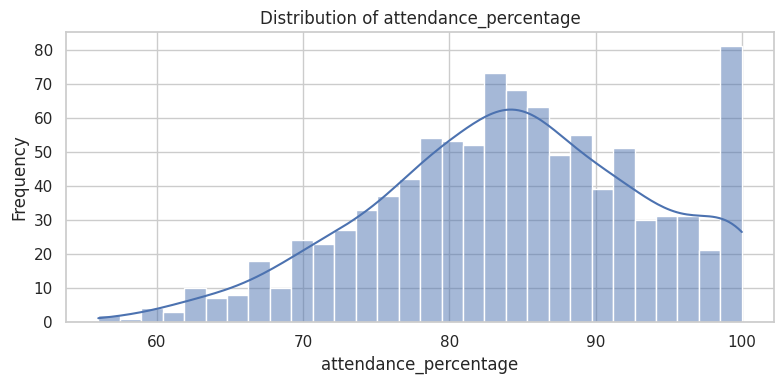

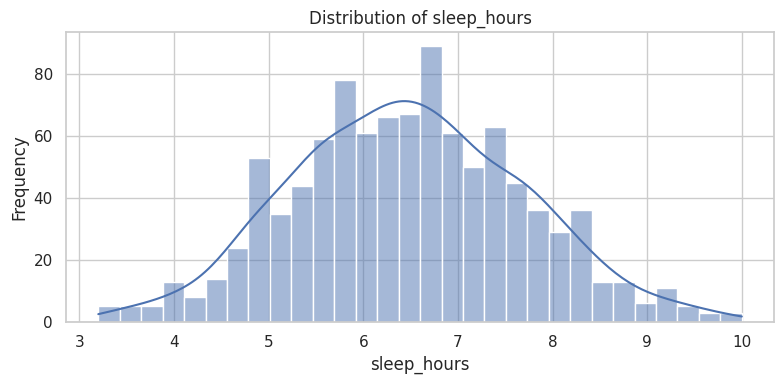

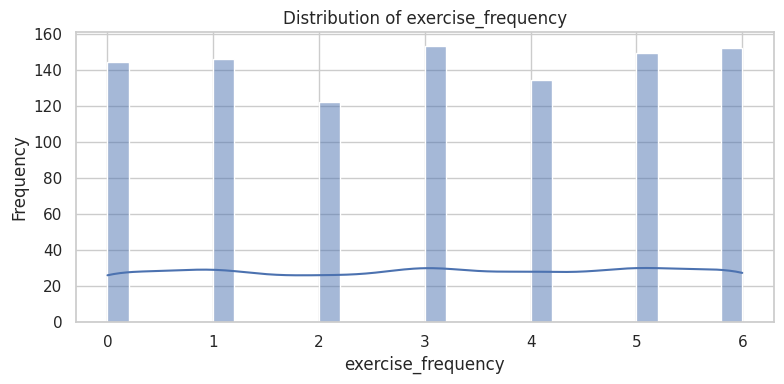

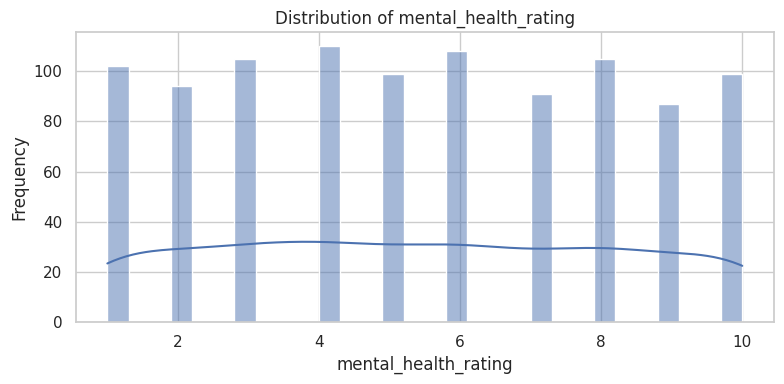

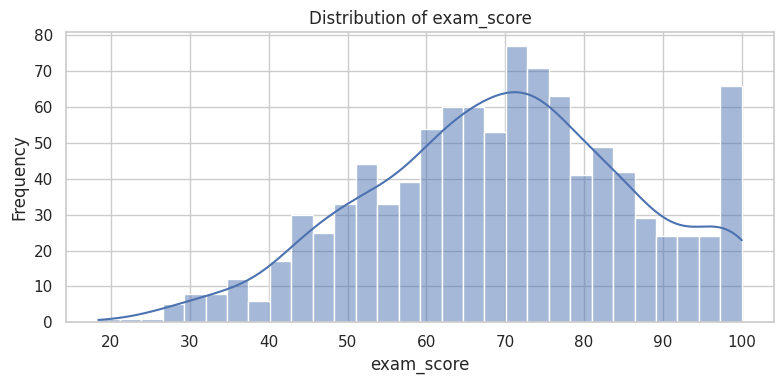

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Loop through each numeric column and plot distplot
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# outlier detection by z-score

used for guassian distribution

In [ ]:
print('mean of study_hours_per_day',df['study_hours_per_day'].mean())
print('median of study_hours_per_day',df['study_hours_per_day'].median())
print('minimum value of study_hours_per_day',df['study_hours_per_day'].min())
print('maximum of study_hours_per_day',df['study_hours_per_day'].max())



mean of study_hours_per_day 3.5501000000000005
median of study_hours_per_day 3.5
minimum value of study_hours_per_day 0.0
maximum of study_hours_per_day 8.3


In [ ]:
# Finding boundary values
print('Highest allowed',df['study_hours_per_day'].mean() + 3*df['study_hours_per_day'].std())
print('Lowest allowed',df['study_hours_per_day'].mean() - 3*df['study_hours_per_day'].std())

Highest allowed 7.956769791197047
Lowest allowed -0.856569791197046


In [ ]:
df[(df['study_hours_per_day']>7.95) & (df['study_hours_per_day']<0.5)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score


Trimming

In [ ]:
new_df=df[(df['study_hours_per_day']<7.95) | (df['study_hours_per_day']>0.5)]
new_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [ ]:
df['study_hours_per_day_z-score']=(df['study_hours_per_day']-df['study_hours_per_day'].mean())/df['study_hours_per_day'].std()


In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_per_day_z-score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,-2.416859
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2.280566
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,-1.463758
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,-1.736073
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.987072


In [ ]:
df[(df['study_hours_per_day_z-score']>3 ) |  (df['study_hours_per_day_z-score']<-3)]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_per_day_z-score
455,S1455,19,Male,8.3,3.3,2.6,Yes,86.6,6.5,Fair,5,High School,Average,9,No,100.0,3.233666
797,S1797,23,Male,8.2,2.2,1.5,No,83.1,5.7,Poor,2,Master,Good,5,Yes,100.0,3.165588


In [ ]:
new_df=df[(df['study_hours_per_day_z-score']<3 ) &  (df['study_hours_per_day_z-score']>-3)]
new_df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_per_day_z-score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,-2.416859
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2.280566
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,-1.463758
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,-1.736073
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.987072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,-0.646815
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,-0.442579
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,-0.374500
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,1.259386


Capping

In [ ]:
upper_limit=df['study_hours_per_day'].mean() + 3*df['study_hours_per_day'].std()
lower_limit=df['study_hours_per_day'].mean() - 3*df['study_hours_per_day'].std()

In [ ]:
df['study_hours_per_day']=np.where(df['study_hours_per_day']>upper_limit,upper_limit,
np.where(df['study_hours_per_day']<lower_limit,lower_limit,df['study_hours_per_day']))

In [ ]:
df['study_hours_per_day'].describe()

,study_hours_per_day
count,1000.000000
mean,3.549514
std,1.467067
min,0.000000
25%,2.600000
50%,3.500000
75%,4.500000
max,7.956770


# Using IQR or Boxplot:

Used when data is skewed

In [ ]:
df['netflix_hours'].skew()

np.float64(0.23715439564540441)

In [ ]:
df['netflix_hours'].describe()

,netflix_hours
count,1000.000000
mean,1.819700
std,1.075118
min,0.000000
25%,1.000000
50%,1.800000
75%,2.525000
max,5.400000


<Axes: ylabel='netflix_hours'>

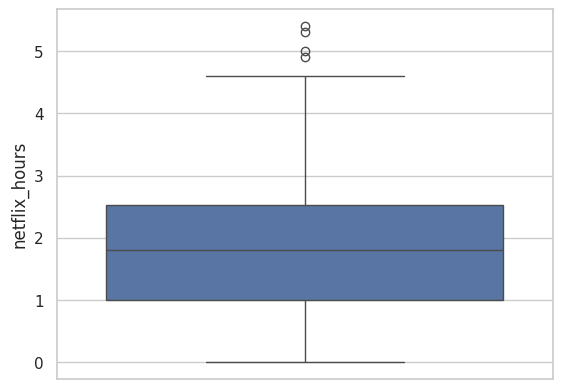

In [ ]:
sns.boxplot(df['netflix_hours'])

In [ ]:
#finding iqr
percentile25=df['netflix_hours'].quantile(0.25)
percentile75=df['netflix_hours'].quantile(0.75)
iqr=percentile75-percentile25
iqr

np.float64(1.525)

In [ ]:
upper_limit=percentile75+ 1.5*iqr
lower_limit=percentile25- 1.5*iqr
print(upper_limit)
print(lower_limit)

4.8125
-1.2874999999999996


In [ ]:
df[df['netflix_hours']>upper_limit]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_per_day_z-score
81,S1081,20,Other,3.2,3.2,5.0,No,100.0,6.7,Good,5,High School,Poor,2,No,57.6,-0.238343
556,S1556,24,Female,4.0,3.3,5.4,No,81.2,7.6,Fair,6,Bachelor,Poor,6,No,79.0,0.306286
822,S1822,22,Female,2.6,3.4,5.3,No,79.8,9.0,Poor,0,Bachelor,Good,2,No,49.1,-0.646815
887,S1887,22,Male,3.5,2.1,4.9,No,97.0,7.2,Good,5,NaN,Poor,9,No,75.9,-0.034107


Trimming

In [ ]:
new_df=df[df['netflix_hours']<upper_limit]

<Axes: ylabel='netflix_hours'>

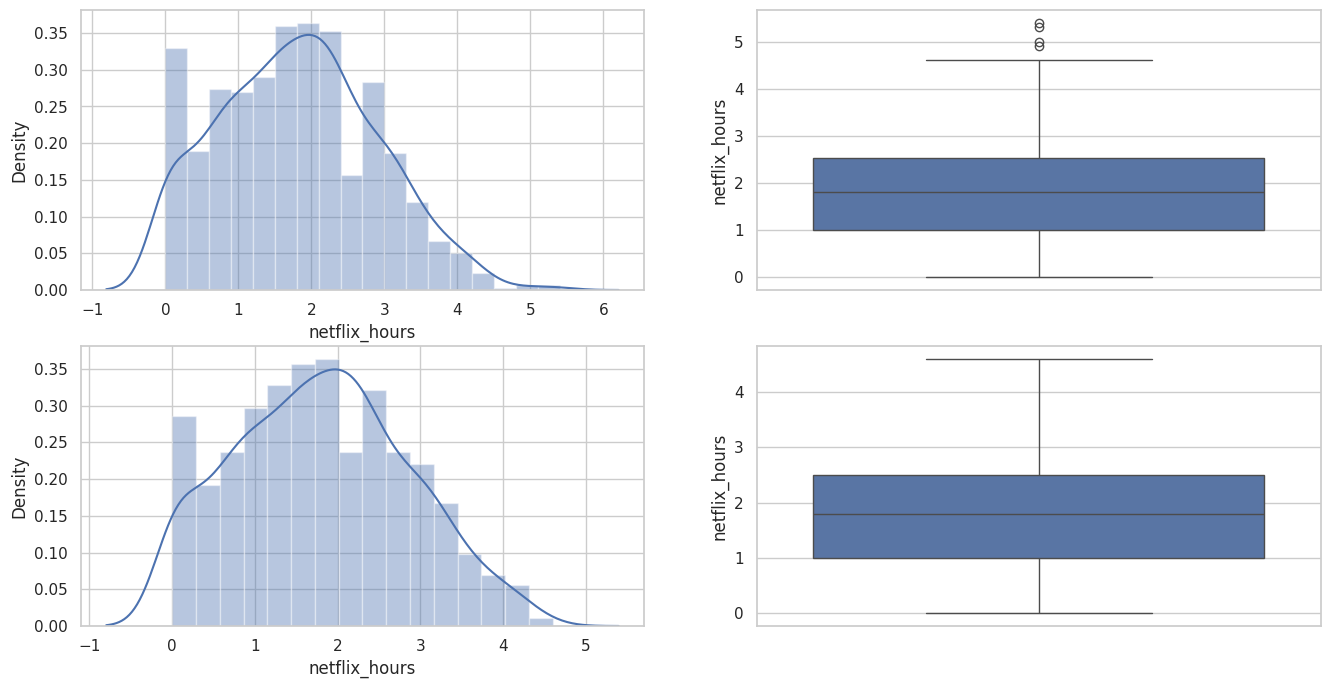

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['netflix_hours'])
plt.subplot(2,2,2)
sns.boxplot(df['netflix_hours'])
plt.subplot(2,2,3)
sns.distplot(new_df['netflix_hours'])
plt.subplot(2,2,4)
sns.boxplot(new_df['netflix_hours'])

In [ ]:
new_df_cap=df.copy()
new_df_cap['netflix_hours']=np.where(df['netflix_hours']>upper_limit,upper_limit,df['netflix_hours'])

In [ ]:
new_df_cap

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_per_day_z-score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,-2.416859
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,2.280566
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,-1.463758
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,-1.736073
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,0.987072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,-0.646815
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,-0.442579
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,-0.374500
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,1.259386


In [ ]:
new_df_cap['netflix_hours'].describe()

,netflix_hours
count,1000.000000
mean,1.818350
std,1.071056
min,0.000000
25%,1.000000
50%,1.800000
75%,2.525000
max,4.812500


`Using Percentiles to detect outliers`

cappping also called vinserization

In [ ]:
df.sample(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_per_day_z-score
365,S1365,23,Female,5.1,3.1,0.5,Yes,81.9,4.8,Good,1,NaN,Poor,3,No,76.0,1.055151
977,S1977,24,Female,5.8,1.3,2.2,Yes,89.1,7.9,Good,5,High School,Average,1,Yes,99.0,1.531701
908,S1908,23,Female,5.6,2.8,0.5,Yes,92.2,9.4,Fair,4,Bachelor,Good,8,No,100.0,1.395544
523,S1523,23,Other,4.0,3.4,3.2,No,83.0,6.6,Good,5,High School,Average,1,No,61.7,0.306286
464,S1464,20,Male,6.3,3.0,3.9,Yes,73.1,6.9,Fair,2,Master,Average,5,No,85.3,1.872094


<Axes: ylabel='social_media_hours'>

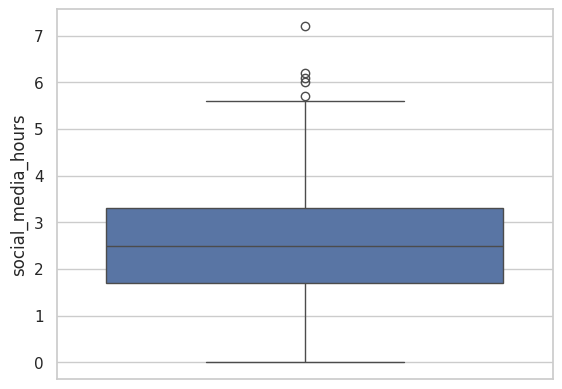

In [ ]:
sns.boxplot(df['social_media_hours'])

In [ ]:
upper_limit=df['social_media_hours'].quantile(0.98)
lower_limit=df['social_media_hours'].quantile(0.02)
upper_limit

np.float64(4.9)

In [ ]:
lower_limit

np.float64(0.0)

In [ ]:
new_df=df[(df['social_media_hours']<upper_limit )& (df['social_media_hours']>lower_limit)]

<Axes: ylabel='social_media_hours'>

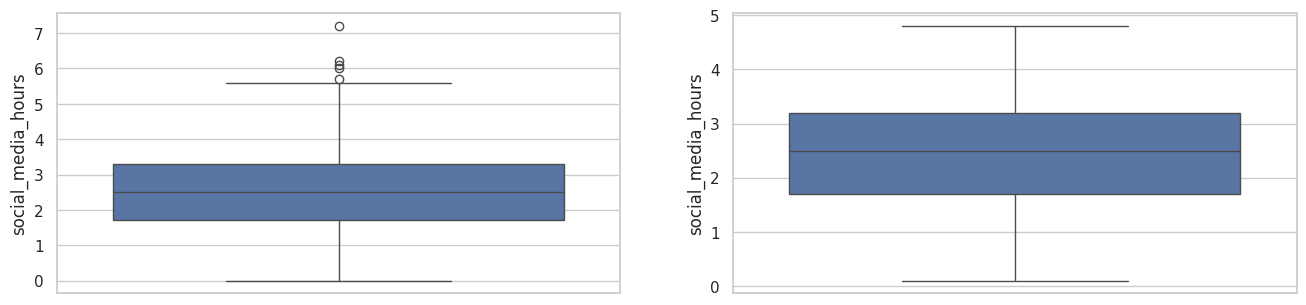

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)

sns.boxplot(df['social_media_hours'])
plt.subplot(2,2,2)
sns.boxplot(new_df['social_media_hours'])


In [ ]:
df['social_media_hours'].describe()

,social_media_hours
count,1000.000000
mean,2.505500
std,1.172422
min,0.000000
25%,1.700000
50%,2.500000
75%,3.300000
max,7.200000


In [ ]:
new_df['social_media_hours'].describe()

,social_media_hours
count,956.000000
mean,2.492992
std,1.049709
min,0.100000
25%,1.700000
50%,2.500000
75%,3.200000
max,4.800000


capping

In [ ]:

df['social_media_hours'] = np.where(
    df['social_media_hours'] >= upper_limit, upper_limit,
    np.where(df['social_media_hours'] <= lower_limit, lower_limit, df['social_media_hours'])
)


In [ ]:
df['social_media_hours'].describe()

,social_media_hours
count,1000.000000
mean,2.496000
std,1.147772
min,0.000000
25%,1.700000
50%,2.500000
75%,3.300000
max,4.900000


<Axes: ylabel='social_media_hours'>

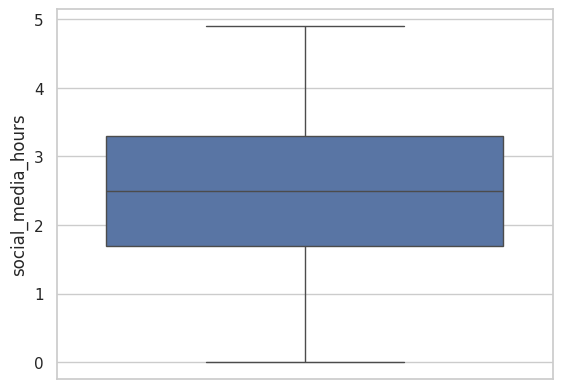

In [ ]:
sns.boxplot(df['social_media_hours'])